### Import Library

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import warnings
warnings.filterwarnings('ignore')
import os

### Import Data


In [18]:
data = pd.read_csv("bank-additional-full.csv",sep=";")
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

# 1. Data Vizilation

### All Ratio of Feature

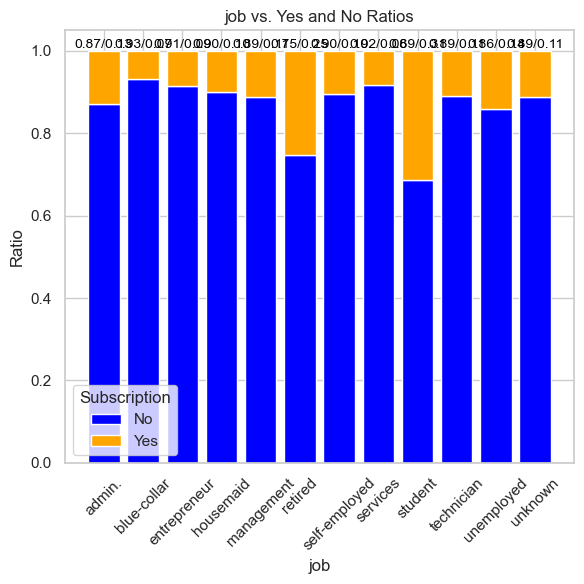

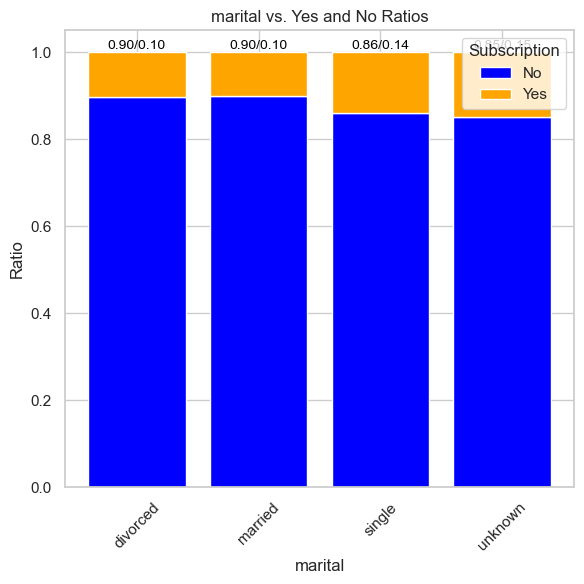

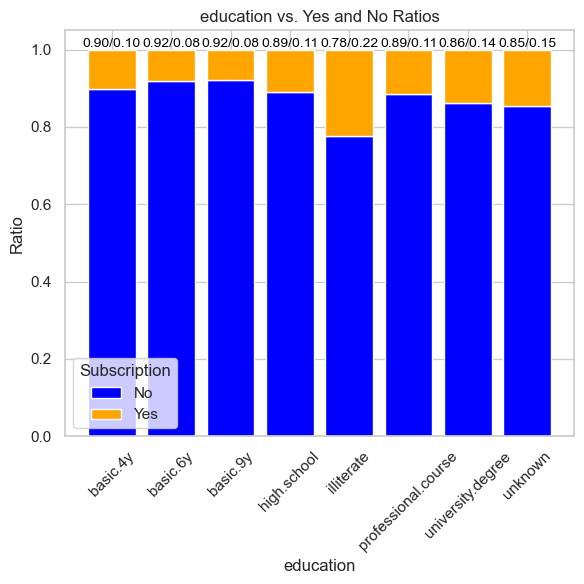

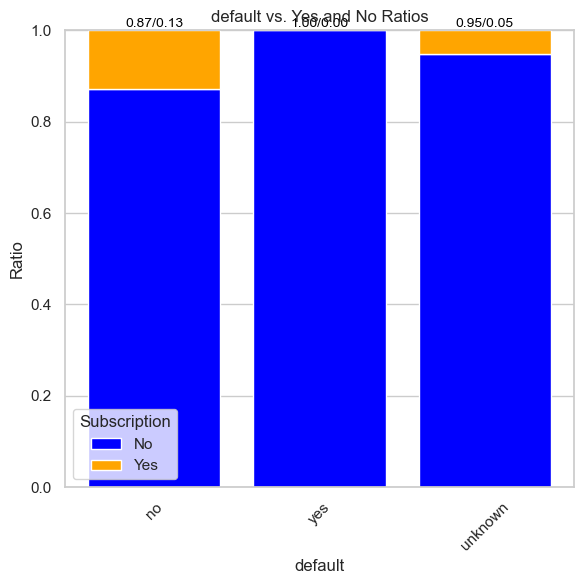

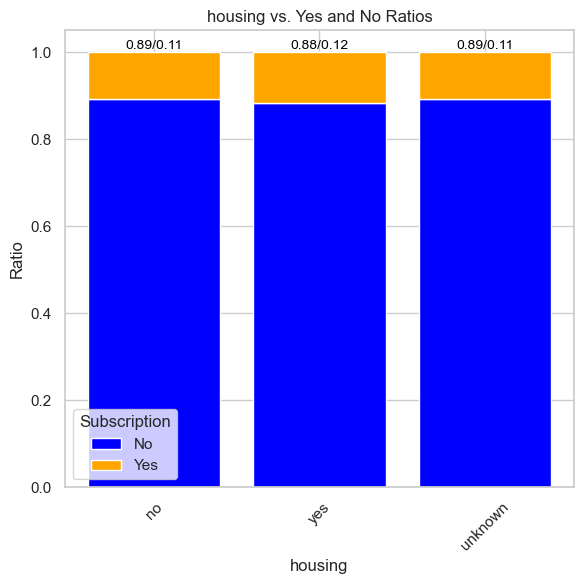

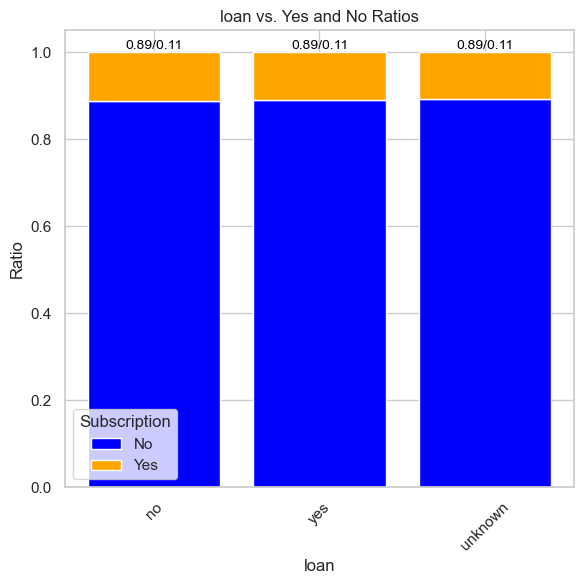

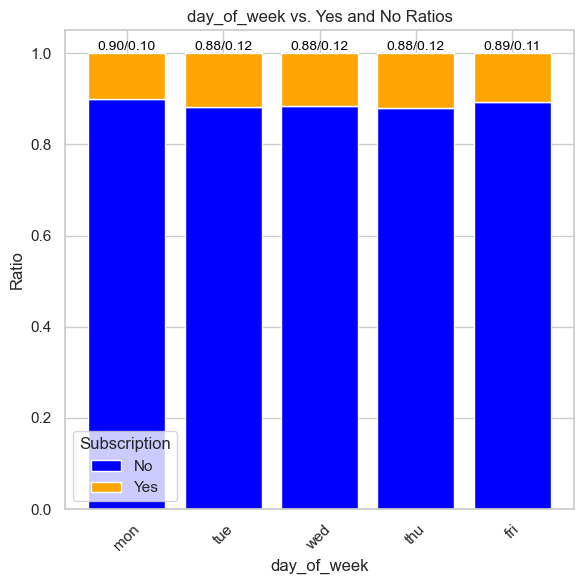

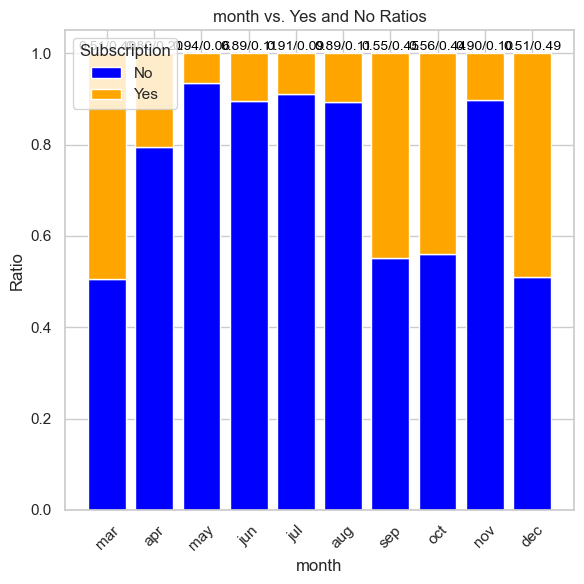

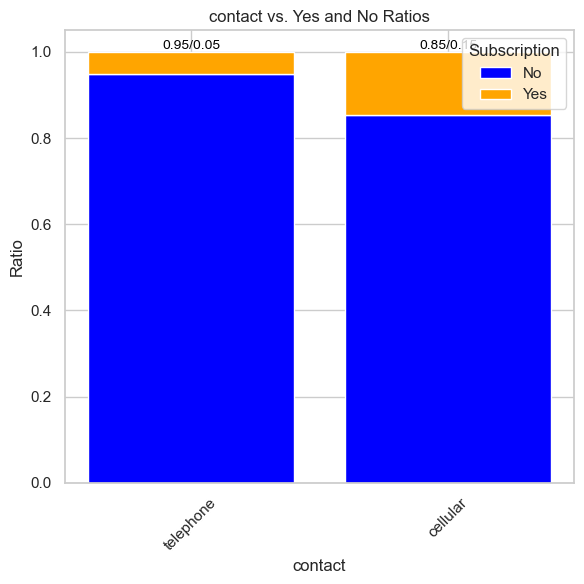

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Kategorik özellikler ve kategorilerin listesi
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan','day_of_week','month','contact']
categories = {
    'job': ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'],
    'marital': ['divorced', 'married', 'single', 'unknown'],
    'education': ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'],
    'default': ['no', 'yes', 'unknown'],
    'housing': ['no', 'yes', 'unknown'],
    'loan': ['no', 'yes', 'unknown'],
    'day_of_week': ['mon','tue','wed','thu','fri'],
    'month': ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
    'contact' : ['telephone','cellular'],
}

# Her bir kategorik özellik için oranları ve sayısal değerleri hesaplamak ve depolamak için boş bir liste oluşturun
feature_ratios = []

# Her bir kategorik özellik için oranları ve sayısal değerleri hesaplayın ve listeye ekleyin
for feature in categorical_features:
    feature_category_ratios = []
    for category in categories[feature]:
        subset = data[data[feature] == category]
        category_no_ratio = subset['y'].value_counts(normalize=True).get(0, 0)
        category_yes_ratio = subset['y'].value_counts(normalize=True).get(1, 0)
        feature_category_ratios.append({'category': category, 'no_ratio': category_no_ratio, 'yes_ratio': category_yes_ratio})
    feature_ratios.append({'feature': feature, 'ratios': feature_category_ratios})

# Oranları ve sayısal değerleri içeren DataFrame'i oluşturun
ratios_df = pd.DataFrame(feature_ratios)

# Her bir kategorik özellik için grafikleri çizin ve sayısal değerleri bastırın
for i, row in ratios_df.iterrows():
    plt.figure(figsize=(6, 6))
    plt.bar(row['ratios'][0]['category'], row['ratios'][0]['no_ratio'], color='blue', label='No')
    plt.bar(row['ratios'][0]['category'], row['ratios'][0]['yes_ratio'], bottom=row['ratios'][0]['no_ratio'], color='orange', label='Yes')
    for ratio in row['ratios'][1:]:
        plt.bar(ratio['category'], ratio['no_ratio'], color='blue')
        plt.bar(ratio['category'], ratio['yes_ratio'], bottom=ratio['no_ratio'], color='orange')

    # Sayısal değerleri altında göster
    plt.title(f'{row["feature"]} vs. Yes and No Ratios')
    plt.xlabel(row['feature'])
    plt.ylabel('Ratio')
    plt.xticks(rotation=45)
    plt.legend(title='Subscription')

    # Sayısal değerleri bastır
    for ratio in row['ratios']:
        plt.text(ratio['category'], ratio['no_ratio'] + ratio['yes_ratio'], f'{ratio["no_ratio"]:.2f}/{ratio["yes_ratio"]:.2f}', ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()


### Pie chart

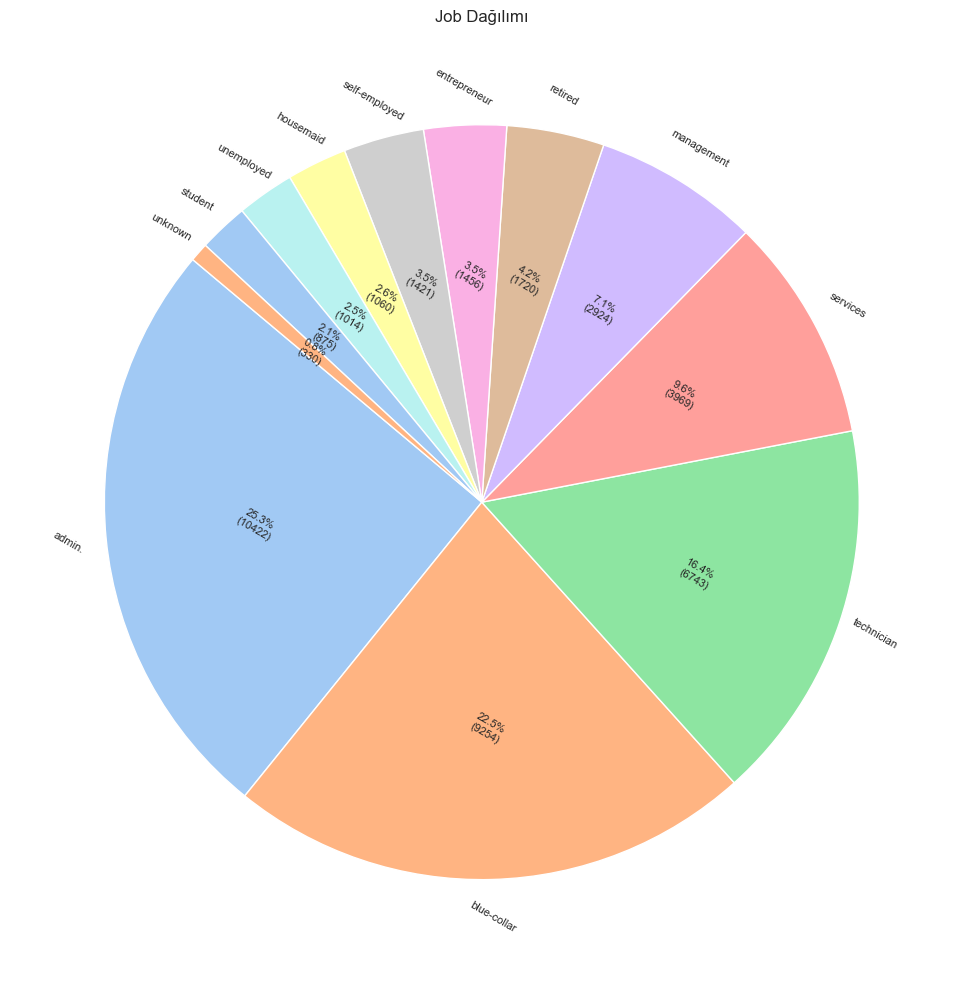

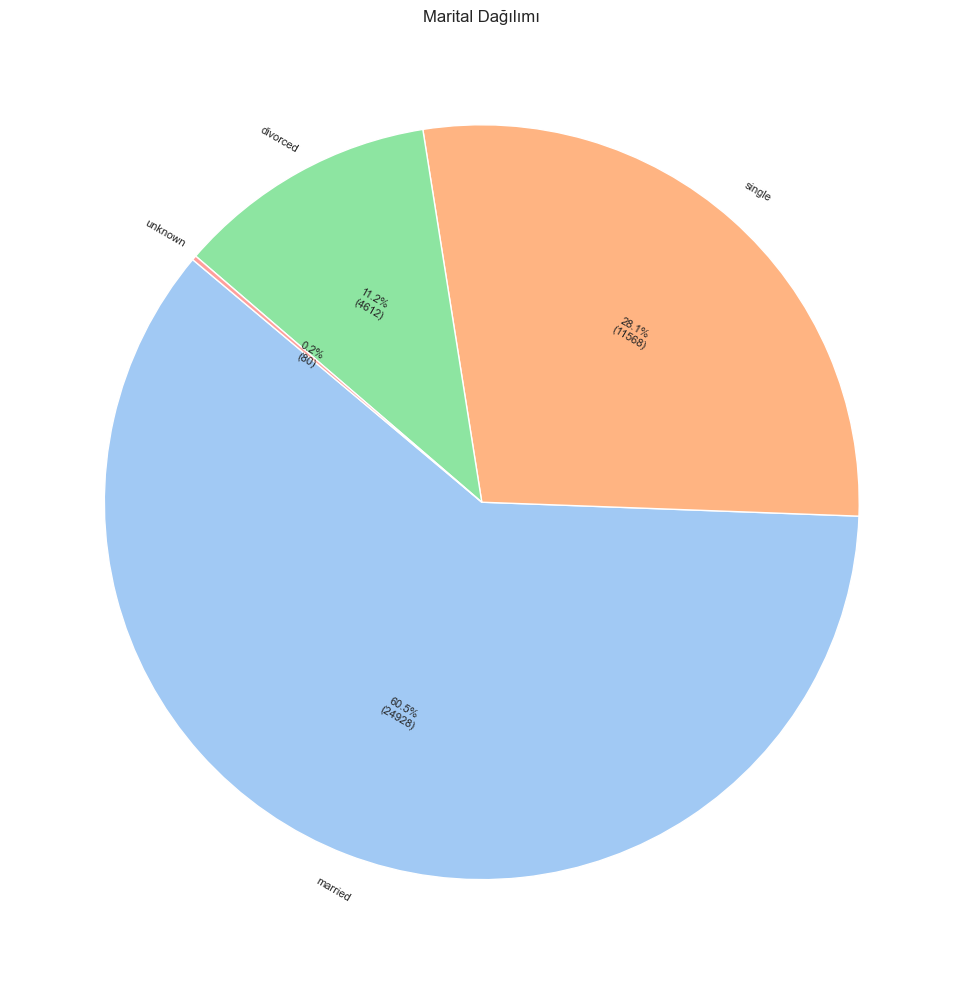

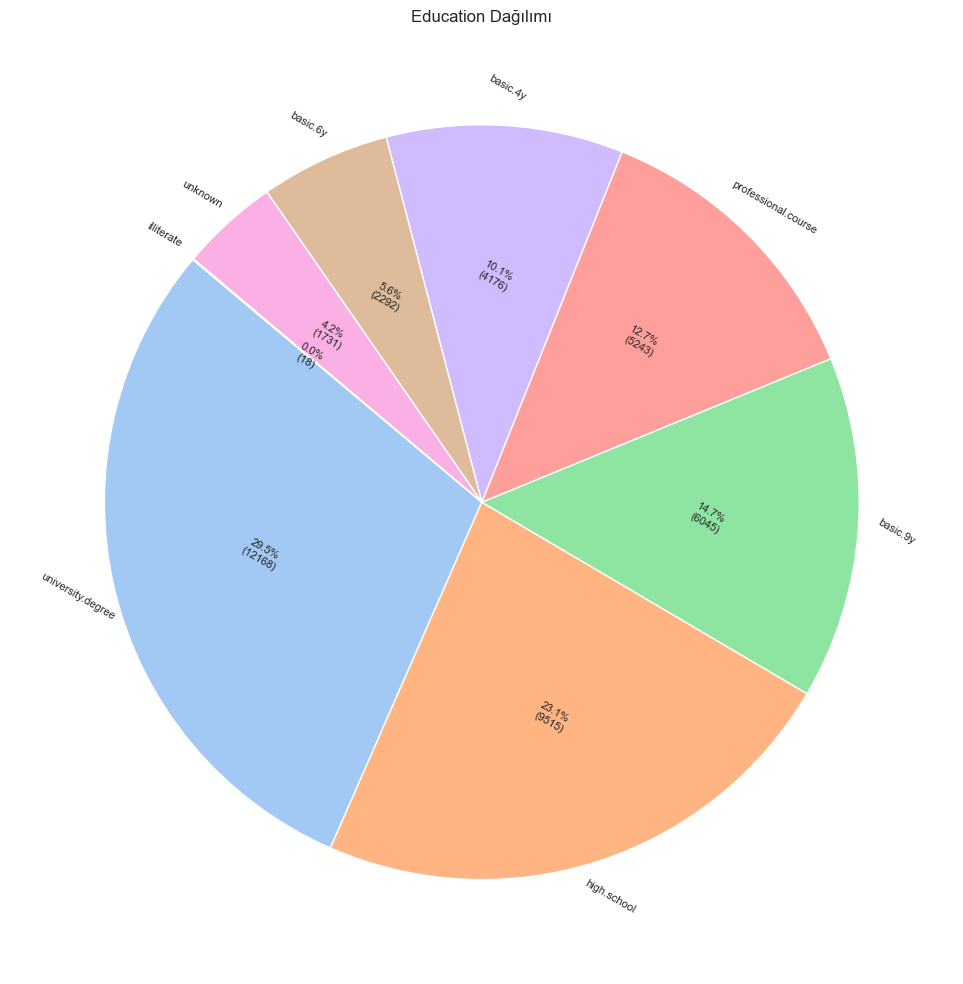

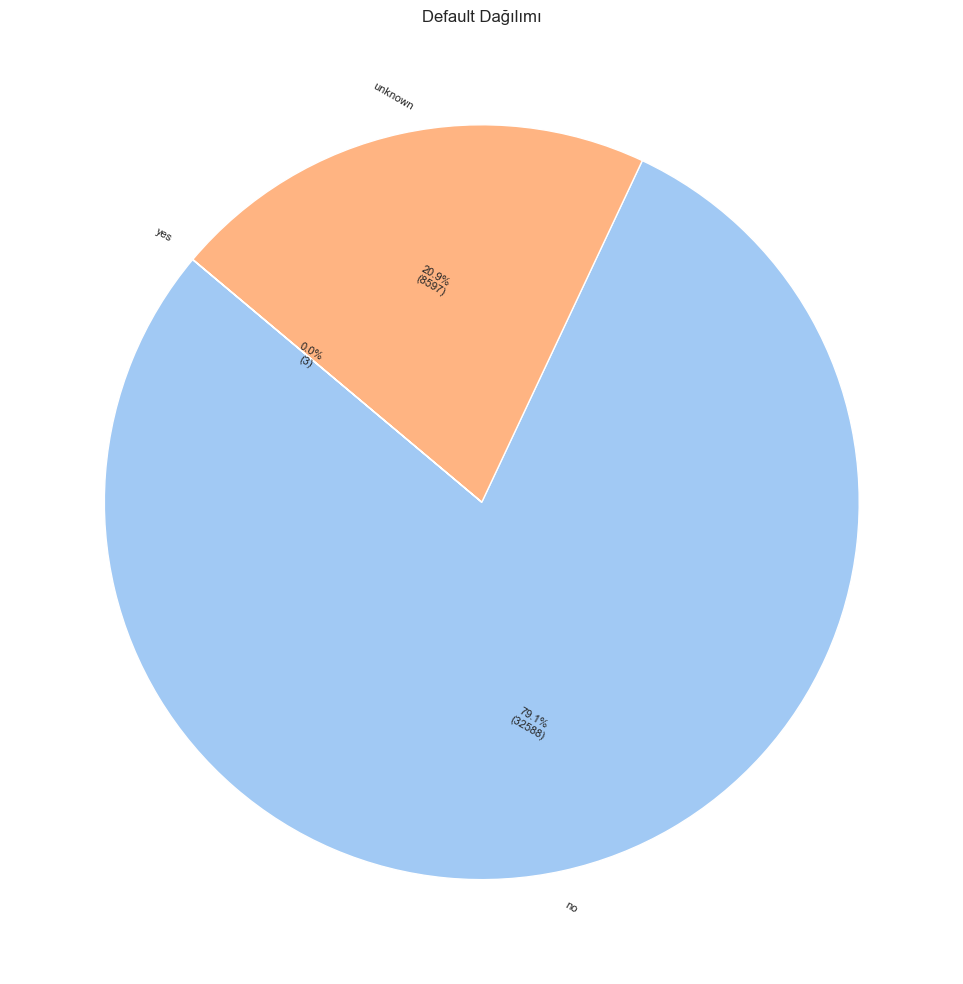

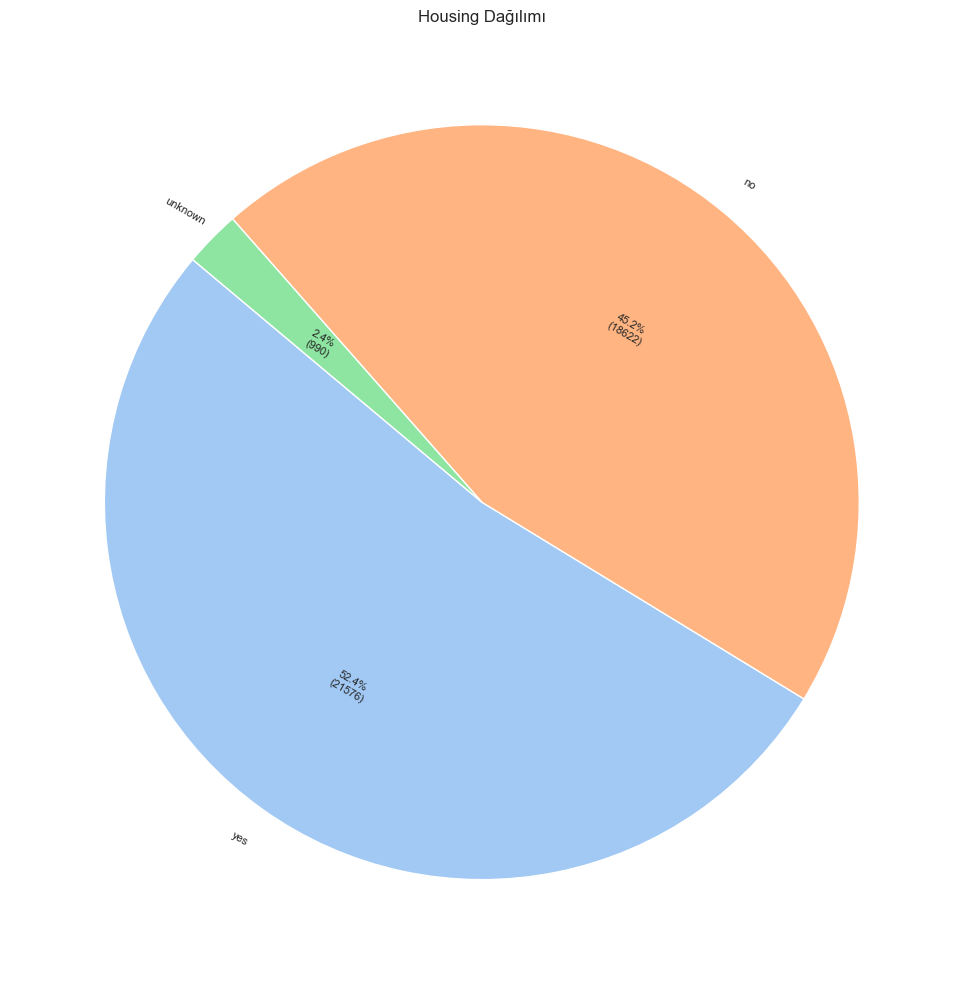

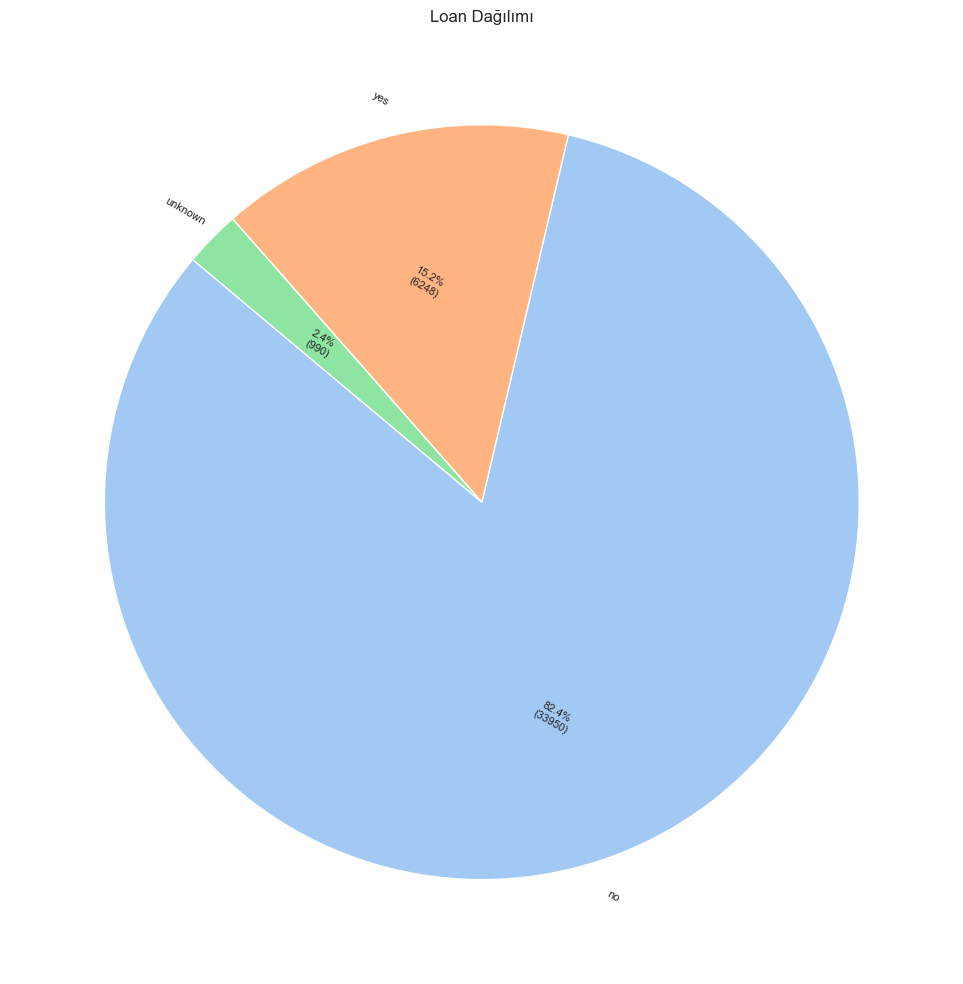

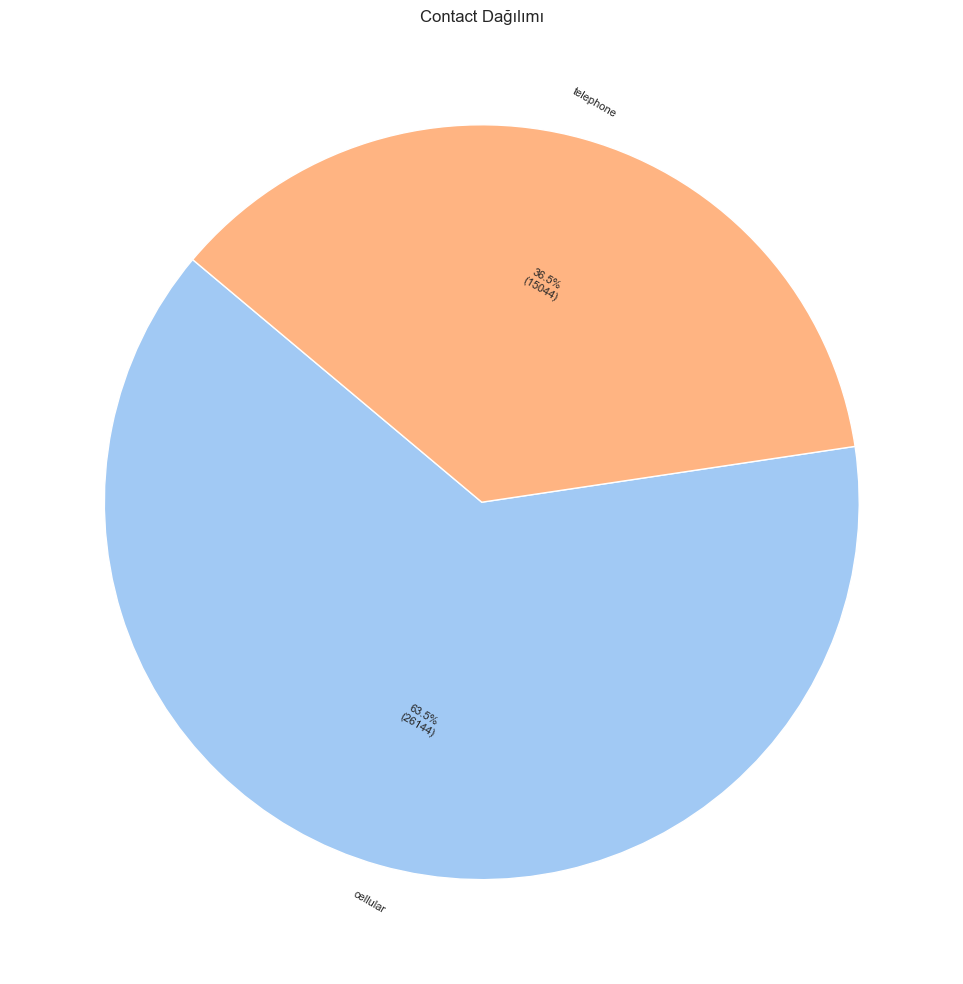

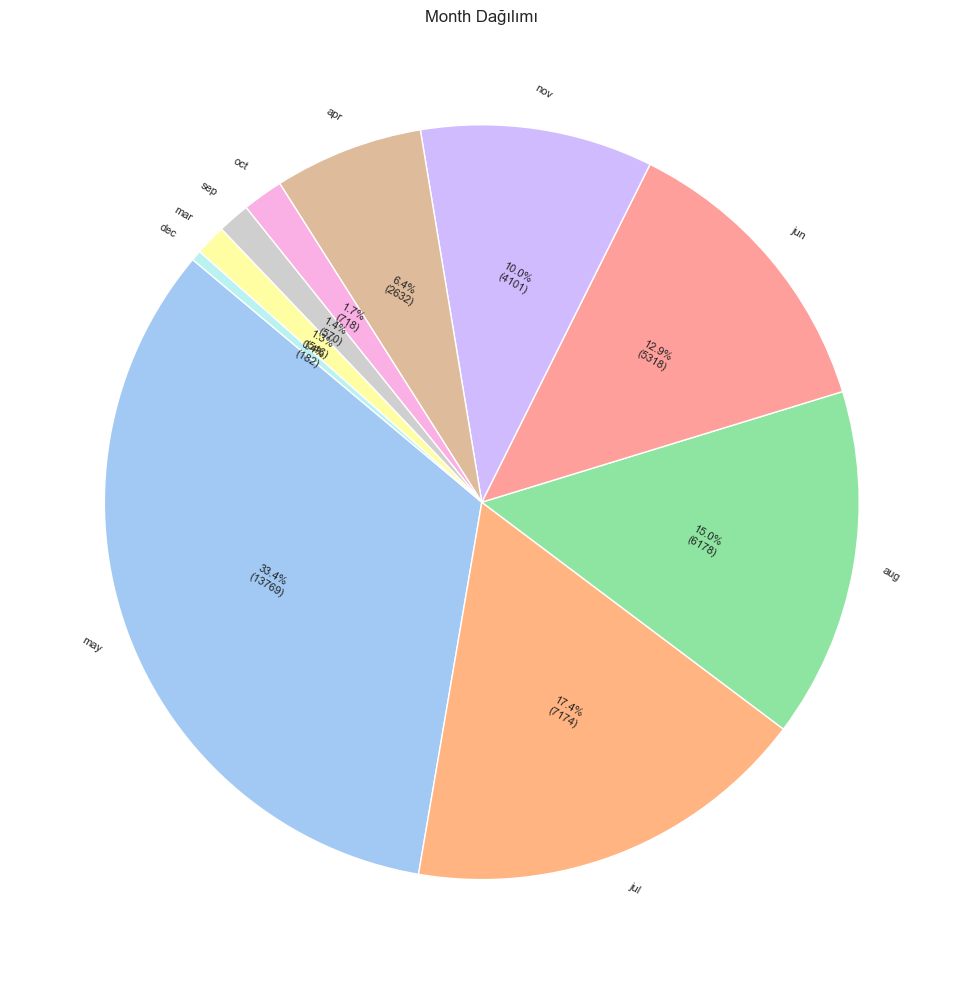

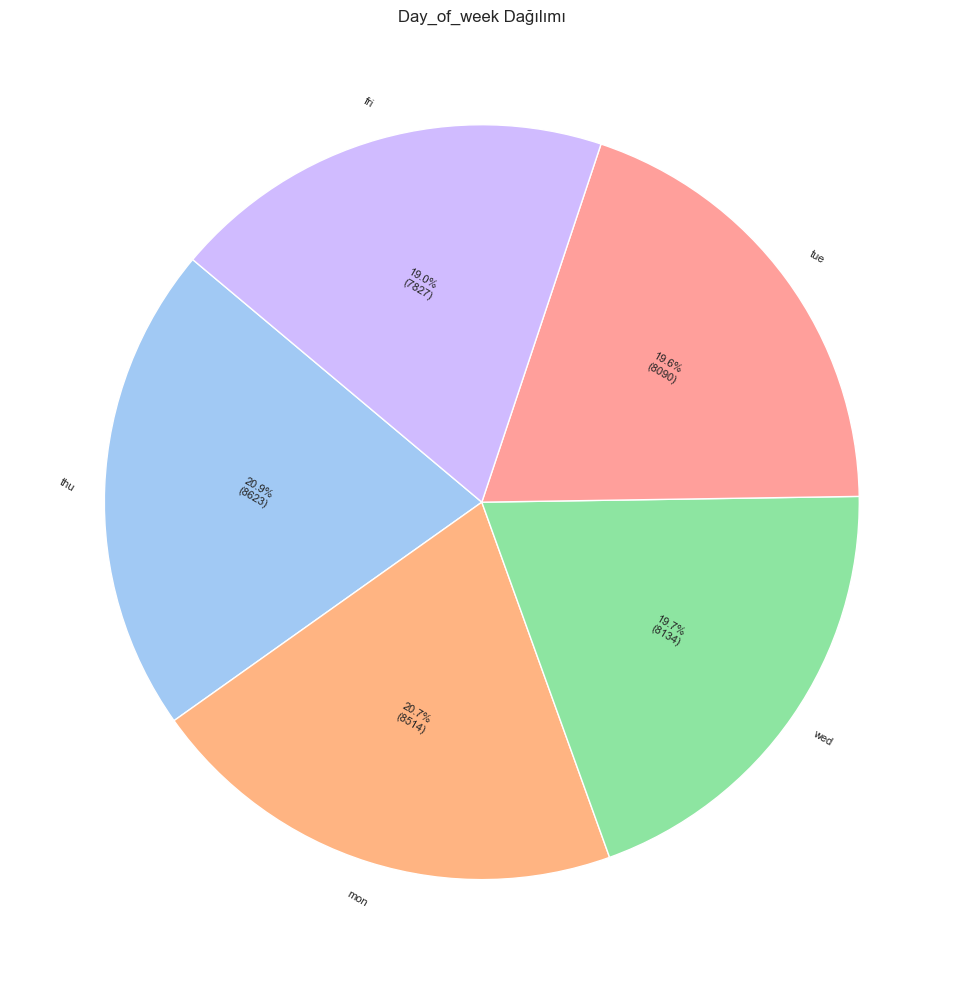

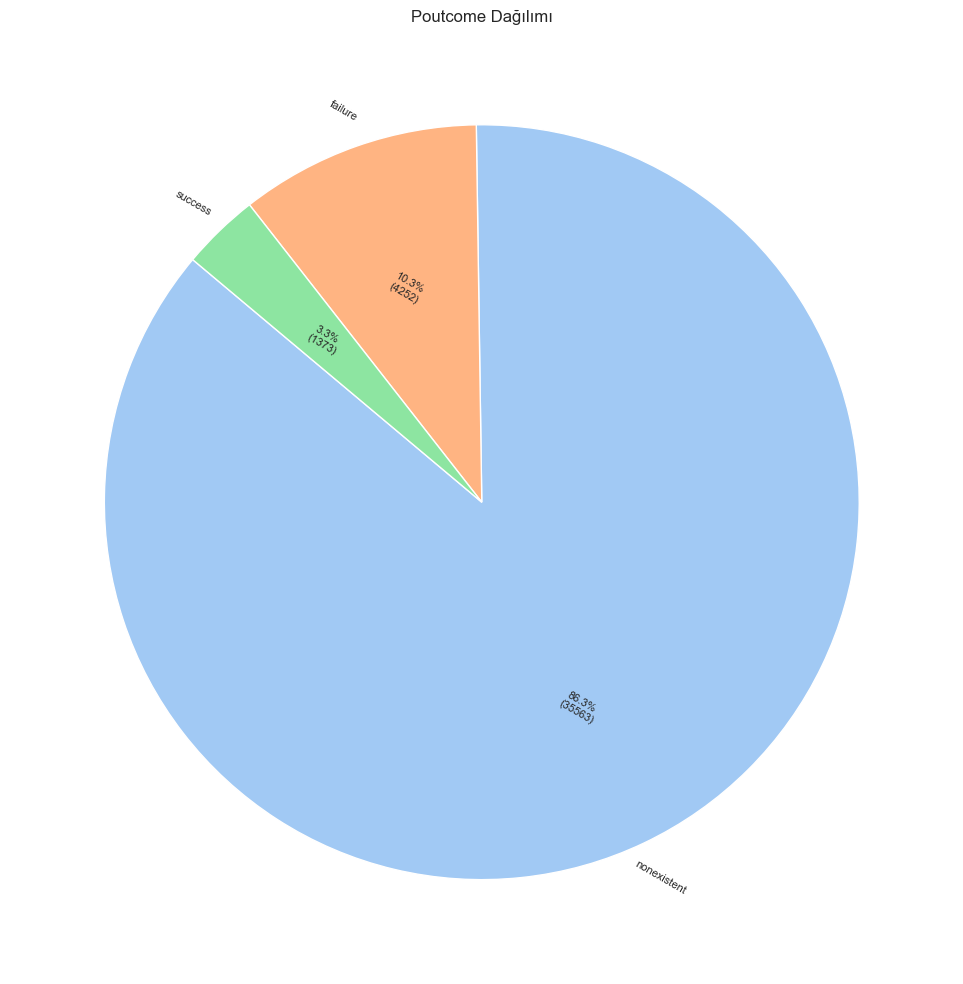

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Kategorik özellikler ve kategorilerin listesi
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Her bir kategorik özellik için pasta grafikleri oluşturun
for feature in categorical_features:
    plt.figure(figsize=(10, 10))
    sns.set(style="whitegrid")
    feature_data = data[feature].value_counts()
    wedges, texts, autotexts = plt.pie(feature_data, labels=feature_data.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(feature_data) / 100),
                                       textprops={'fontsize': 8, 'rotation': -30, 'ha': 'center', 'va': 'center'}, startangle=140, colors=sns.color_palette("pastel"))

    for text in texts:
        text.set_rotation(-30)

    plt.title(f'{feature.capitalize()} Dağılımı')
    plt.tight_layout()
    plt.show()


# Data Analaysis


In [21]:
fig = px.box(data, x="job", y="duration", color="y")
fig.update_traces(quartilemethod="inclusive")
fig.show()

In [22]:
import plotly.express as px

# Kutu grafiği oluştur
fig = px.box(data, x="job", y="age", color="job")
fig.update_traces(quartilemethod="inclusive")

# Grafiği göster
fig.show()


In [23]:
import plotly.express as px

# İş gruplarının sayı dağılımlarını oluştur
job_counts = data['job'].value_counts()

# Bar grafik oluştur
fig = px.bar(x=job_counts.index, y=job_counts.values, labels={'x': 'Meslek Grubu', 'y': 'Sayı Dağılımı'})
fig.update_xaxes(type='category', tickmode='linear')

# Grafiği göster
fig.show()


In [24]:
import pandas as pd
import plotly.express as px

# Meslek gruplarının "evet" ve "hayır" sayılarını hesapla
job_counts = data.groupby('job')['y'].value_counts().unstack().fillna(0)
job_counts['total'] = job_counts['yes'] + job_counts['no']
job_counts['yes_ratio'] = job_counts['yes'] / job_counts['total']
job_counts.reset_index(inplace=True)

# Grafik oluştur
fig = px.bar(job_counts, x='job', y='yes_ratio', text='yes_ratio', color_discrete_sequence=['orange'], labels={'job': 'Meslek Grubu', 'yes_ratio': 'Evet Oranı'}, title='Meslek Gruplarının Evet Oranları')
fig.update_traces(texttemplate='%{text:.1%}', textposition='outside')
fig.update_xaxes(type='category', tickmode='linear', tickangle=45)

# Grafiği göster
fig.show()


### Çağrı Süresi ve Aranma Sayısı

In [25]:
fig = px.scatter(data, x="campaign", y="duration",color="y")
fig.show()

In [26]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables as numerical values
label_encoder = LabelEncoder()
for column in data.select_dtypes(include='object').columns:
    data[column] = label_encoder.fit_transform(data[column])
    

corr = data.corr()
corr.style.background_gradient(cmap='PuBu')

In [27]:
# Vadeli mevduatı kabul eden kişileri seçin (örnek olarak 'yes' sütununu kullanıyorum)
deposits_accepted = data[data['y'] == 'yes']

fig = px.histogram(deposits_accepted, x='age', nbins=90, title='Age Histogram')  # bins: çubuk sayısı
fig.update_xaxes(title_text='Age')
fig.show()


# Feature Engineering

## Removing Unnecessary Data

In [28]:
training_data = data.copy()

training_data.drop(columns=['loan','day_of_week','housing','month'], inplace=True)

## Data Merging

In [29]:

lst=['basic.9y','basic.6y','professional.course']
for i in lst:
    training_data.loc[training_data['education'] == i, 'education'] = "9y_6y_and_professional"

lst=['basic.4y','high.school']
for i in lst:
    training_data.loc[training_data['education'] == i, 'education'] = "4y_and_high_school"

lst=['university.degree','unknown']
for i in lst:
    training_data.loc[training_data['education'] == i, 'education'] = "university_and_unknown"

lst=['blue-collar','services']
for i in lst:
    training_data.loc[training_data['job'] == i, 'job'] = "blue-collor_and_services"

lst=['admin','unemployed']
for i in lst:
    training_data.loc[training_data['job'] == i, 'job'] = "admin_and_unemployed"

lst=['entrepreneur','housemaid','management','self-employed','technician','unknown']
for i in lst:
    training_data.loc[training_data['job'] == i, 'job'] = "entrepreneur_housemaid_management_self-employed_technician_unknown"

lst=['divorced','married']
for i in lst:
    training_data.loc[training_data['marital'] == i, 'marital'] = "marital_divorved"

lst=['single','unknown']
for i in lst:
    training_data.loc[training_data['marital'] == i, 'marital'] = "single_unknown"

## Create categorical variable

### Month, day of week, education and job


In [30]:
training_data = pd.get_dummies(training_data,columns=["job","education"])


In [32]:
# 'default' sütunundaki değerleri 1, 0 ve -1 ile eşleştirme
training_data['y'] = training_data['y'].map({'no': 0, 'yes': 1}).astype('float64').fillna(-1)



In [33]:
corr = training_data.corr()
corr.style.background_gradient(cmap='PuBu')

In [34]:
training_data

age  marital  default  contact  duration  campaign  pdays  previous  \
0       56      NaN      NaN      NaN       261         1    999         0   
1       57      NaN      NaN      NaN       149         1    999         0   
2       37      NaN      NaN      NaN       226         1    999         0   
3       40      NaN      NaN      NaN       151         1    999         0   
4       56      NaN      NaN      NaN       307         1    999         0   
...    ...      ...      ...      ...       ...       ...    ...       ...   
41183   73      NaN      NaN      NaN       334         1    999         0   
41184   46      NaN      NaN      NaN       383         1    999         0   
41185   56      NaN      NaN      NaN       189         2    999         0   
41186   44      NaN      NaN      NaN       442         1    999         0   
41187   74      NaN      NaN      NaN       239         3    999         1   

       poutcome  emp.var.rate  ...  job_10  job_11  education_0  education_1  \
0           NaN           1.1  ...   False   False         True        False   
1           NaN           1.1  ...   False   False        False        False   
2           NaN           1.1  ...   False   False        False        False   
3           NaN           1.1  ...   False   False        False         True   
4           NaN           1.1  ...   False   False        False        False   
...         ...           ...  ...     ...     ...          ...          ...   
41183       NaN          -1.1  ...   False   False        False        False   
41184       NaN          -1.1  ...   False   False        False        False   
41185       NaN          -1.1  ...   False   False        False        False   
41186       NaN          -1.1  ...   False   False        False        False   
41187       NaN          -1.1  ...   False   False        False        False   

       education_2  education_3  education_4  education_5  education_6  \
0            False        False        False        False        False   
1            False         True        False        False        False   
2            False         True        False        False        False   
3            False        False        False        False        False   
4            False         True        False        False        False   
...            ...          ...          ...          ...          ...   
41183        False        False        False         True        False   
41184        False        False        False         True        False   
41185        False        False        False        False         True   
41186        False        False        False         True        False   
41187        False        False        False         True        False   

       education_7  
0            False  
1            False  
2            False  
3            False  
4            False  
...            ...  
41183        False  
41184        False  
41185        False  
41186        False  
41187        False  

[41188 rows x 35 columns]

We need to create a new dataset for exel.

In [35]:
training_data_exel = training_data.copy()
training_data.drop(columns=['duration','campaign'], inplace=True)
training_data_exel

age  marital  default  contact  duration  campaign  pdays  previous  \
0       56      NaN      NaN      NaN       261         1    999         0   
1       57      NaN      NaN      NaN       149         1    999         0   
2       37      NaN      NaN      NaN       226         1    999         0   
3       40      NaN      NaN      NaN       151         1    999         0   
4       56      NaN      NaN      NaN       307         1    999         0   
...    ...      ...      ...      ...       ...       ...    ...       ...   
41183   73      NaN      NaN      NaN       334         1    999         0   
41184   46      NaN      NaN      NaN       383         1    999         0   
41185   56      NaN      NaN      NaN       189         2    999         0   
41186   44      NaN      NaN      NaN       442         1    999         0   
41187   74      NaN      NaN      NaN       239         3    999         1   

       poutcome  emp.var.rate  ...  job_10  job_11  education_0  education_1  \
0           NaN           1.1  ...   False   False         True        False   
1           NaN           1.1  ...   False   False        False        False   
2           NaN           1.1  ...   False   False        False        False   
3           NaN           1.1  ...   False   False        False         True   
4           NaN           1.1  ...   False   False        False        False   
...         ...           ...  ...     ...     ...          ...          ...   
41183       NaN          -1.1  ...   False   False        False        False   
41184       NaN          -1.1  ...   False   False        False        False   
41185       NaN          -1.1  ...   False   False        False        False   
41186       NaN          -1.1  ...   False   False        False        False   
41187       NaN          -1.1  ...   False   False        False        False   

       education_2  education_3  education_4  education_5  education_6  \
0            False        False        False        False        False   
1            False         True        False        False        False   
2            False         True        False        False        False   
3            False        False        False        False        False   
4            False         True        False        False        False   
...            ...          ...          ...          ...          ...   
41183        False        False        False         True        False   
41184        False        False        False         True        False   
41185        False        False        False        False         True   
41186        False        False        False         True        False   
41187        False        False        False         True        False   

       education_7  
0            False  
1            False  
2            False  
3            False  
4            False  
...            ...  
41183        False  
41184        False  
41185        False  
41186        False  
41187        False  

[41188 rows x 35 columns]

In [36]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   marital         0 non-null      float64
 2   default         0 non-null      float64
 3   contact         0 non-null      float64
 4   pdays           41188 non-null  int64  
 5   previous        41188 non-null  int64  
 6   poutcome        0 non-null      float64
 7   emp.var.rate    41188 non-null  float64
 8   cons.price.idx  41188 non-null  float64
 9   cons.conf.idx   41188 non-null  float64
 10  euribor3m       41188 non-null  float64
 11  nr.employed     41188 non-null  float64
 12  y               41188 non-null  float64
 13  job_0           41188 non-null  bool   
 14  job_1           41188 non-null  bool   
 15  job_2           41188 non-null  bool   
 16  job_3           41188 non-null  bool   
 17  job_4           41188 non-null 

## Model Learing

## Bütün Modellerin Sonuçları


In [37]:
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [38]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [45]:
from sklearn.impute import SimpleImputer
# Create an imputer transformer to handle missing values
imputer = SimpleImputer(strategy='mean')

# Create a pipeline with the imputer transformer and the logistic regression model
logreg_cv = make_pipeline(imputer, LogisticRegression(random_state=0))

# Rest of the code remains the same
dt_cv = DecisionTreeClassifier()
knn_cv = KNeighborsClassifier()
svc_cv = SVC()
nb_cv = BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'KNN', 3: 'SVC', 4: 'Naive Bayes'}
cv_models = [logreg_cv, dt_cv, knn_cv, svc_cv, nb_cv]

X = training_data.drop(['y'], axis=1)  # Özellikler
y = training_data["y"]  # Etiketler

for i, model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i], cross_val_score(
        model, X, y, cv=10, scoring='accuracy').mean()))
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(
        model, X, y, cv=10, scoring ='accuracy').mean()))


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hbasriuzun/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hbasriuzun/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hbasriuzun/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/hbasriuzun/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hbasriuzun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1252, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: -1.0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

# Bağımsız değişkenler (özellikler) X ve bağımlı değişken (etiket) y olarak ayarlanır
X = training_data.drop(['y'], axis=1)  # Özellikler
y = training_data["y"]  # Etiketler

# Split data into training and testing sets with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize models
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC(probability=True)
nb = BernoulliNB()

models = [logreg, knn, svc, nb]
model_names = ["Logistic Regression", "KNN", "SVC", "Naive Bayes"]

for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    [fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)

    # Find the threshold index for a 0.95 sensitivity
    idx = np.min(np.where(tpr > 0.95))

    # Print results
    print(model_name + " Test Results:")
    print(model_name + " accuracy is %.3f" % accuracy_score(y_test, y_pred))
    print(model_name + " log_loss is %.3f" % log_loss(y_test, y_pred_proba))
    print(model_name + " AUC is %.3f" % auc_score)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %.3f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
    plt.title(f'{model_name} Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
          "and a specificity of %.3f" % (1 - fpr[idx]) +
          ", i.e., a false positive rate of %.2f%%." % (np.array(fpr[idx]) * 100))


IndentationError: unexpected indent (525487625.py, line 28)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(logreg, return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max())
ax.set_ylim(0.20, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

### Logistic Regression with Exel Table


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Bağımsız değişkenler (özellikler) X ve bağımlı değişken (etiket) y olarak ayarlanır
X = training_data_exel  # Özellikler
y = training_data_exel["y"]  # Etiketler

# Split data into training and testing sets with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


# Bağımlı değişkeni (etiket) 1 ve 0 olarak kodlayın (evet ve hayır için)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Logistic Regresyon modelini eğitin (duration özelliğini kullanmadan)
logreg = LogisticRegression()
X_train_no_duration = X_train.drop(columns=['duration','campaign','y'])  # 'duration' özelliğini kaldır
logreg.fit(X_train_no_duration, y_train)

# Evet ve hayır için olasılıkları tahmin edin (duration özelliğini kullanmadan)
X_test_no_duration = X_test.drop(columns=['duration','campaign','y'])  # 'duration' özelliğini kaldır
y_pred_proba = logreg.predict_proba(X_test_no_duration)
yes_probabilities = y_pred_proba[:, 1]  # Evet olasılıkları
no_probabilities = y_pred_proba[:, 0]   # Hayır olasılıkları

# 'duration' ve 'Yes Probability' sütunlarını içeren iki ayrı veri çerçevesi oluşturun
probability_df = pd.DataFrame({'Yes Probability': yes_probabilities})

# Verileri birleştirin
result_df = pd.concat([probability_df, X_test.reset_index(drop=True)], axis=1)

# Olasılıklara göre büyükten küçüğe sıralayın
result_df = result_df.sort_values(by='Yes Probability', ascending=False)

# Verileri Excel dosyasına kaydet
result_df.to_excel('sonuclar___with_probability_and_duration.xlsx', index=False)

# Make predictions and calculate predicted probabilities
y_pred = logreg.predict(X_test_no_duration)
y_pred_proba = logreg.predict_proba(X_test_no_duration)[:, 1]

# Calculate the ROC curve
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

# Find the threshold index for a 0.95 sensitivity
idx = np.min(np.where(tpr > 0.95))

# Print results
print("Train/Test split results:")
print(logreg.__class__.__name__ + " accuracy is %.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__ + " log_loss is %.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__ + " AUC is %.3f" % auc_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %.3f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
      "and a specificity of %.3f" % (1 - fpr[idx]) +
      ", i.e., a false positive rate of %.2f%%." % (np.array(fpr[idx]) * 100))


NameError: name 'training_data_exel' is not defined

In [ ]:
training_data2 = data.copy()

training_data2.drop(columns=['day_of_week','month',], inplace=True)


lst=['basic.9y','basic.6y','professional.course']
for i in lst:
    training_data2.loc[training_data2['education'] == i, 'education'] = "9y_6y_and_professional"

lst=['basic.4y','high.school']
for i in lst:
    training_data2.loc[training_data2['education'] == i, 'education'] = "4y_and_high_school"

lst=['university.degree','unknown']
for i in lst:
    training_data2.loc[training_data2['education'] == i, 'education'] = "university_and_unknown"

lst=['blue-collar','services']
for i in lst:
    training_data2.loc[training_data2['job'] == i, 'job'] = "blue-collor_and_services"

lst=['admin','unemployed']
for i in lst:
    training_data2.loc[training_data2['job'] == i, 'job'] = "admin_and_unemployed"

lst=['entrepreneur','housemaid','management','self-employed','technician','unknown']
for i in lst:
    training_data2.loc[training_data2['job'] == i, 'job'] = "entrepreneur_housemaid_management_self-employed_technician_unknown"

lst=['divorced','married']
for i in lst:
    training_data2.loc[training_data2['marital'] == i, 'marital'] = "marital_divorved"

lst=['single','unknown']
for i in lst:
    training_data2.loc[training_data2['marital'] == i, 'marital'] = "single_unknown"


training_data2 = pd.get_dummies(training_data2,columns=["job","education","loan","housing"])

# 'default' sütunundaki değerleri 1, 0 ve -1 ile eşleştirme
default_mapping = {'yes': 1, 'no': 0, 'unknown': -1}
training_data2['default'] = training_data2['default'].map(default_mapping)
default_mapping = {'failure': 0,'nonexistent': -1,'success': 1}
training_data2['poutcome'] = training_data2['poutcome'].map(default_mapping)

# 'contact' sütunundaki değerleri 1 ve 0 ile eşleştirme
contact_mapping = {'cellular': 1, 'telephone': 0}
training_data2['contact'] = training_data2['contact'].map(contact_mapping)
marital_mapping = {'marital_divorved': 1, 'single_unknown': 0}
training_data2['marital'] = training_data2['marital'].map(marital_mapping)

# 'y' sütunundaki 'yes' ve 'no' değerlerini 1 ve 0 olarak değiştirme
training_data2['y'] = training_data2['y'].map({'no': 0, 'yes': 1}).astype('uint8')

training_data_exel = training_data2.copy()
training_data2.drop(columns=['duration','campaign'], inplace=True)
training_data_exel

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Bağımsız değişkenler (özellikler) X ve bağımlı değişken (etiket) y olarak ayarlanır
X = training_data_exel  # Özellikler
y = training_data_exel["y"]  # Etiketler

# Split data into training and testing sets with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


# Bağımlı değişkeni (etiket) 1 ve 0 olarak kodlayın (evet ve hayır için)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Logistic Regresyon modelini eğitin (duration özelliğini kullanmadan)
logreg = LogisticRegression()
X_train_no_duration = X_train.drop(columns=['duration','campaign','y'])  # 'duration' özelliğini kaldır
logreg.fit(X_train_no_duration, y_train)

# Evet ve hayır için olasılıkları tahmin edin (duration özelliğini kullanmadan)
X_test_no_duration = X_test.drop(columns=['duration','campaign','y'])  # 'duration' özelliğini kaldır
y_pred_proba = logreg.predict_proba(X_test_no_duration)
yes_probabilities = y_pred_proba[:, 1]  # Evet olasılıkları
no_probabilities = y_pred_proba[:, 0]   # Hayır olasılıkları

# 'duration' ve 'Yes Probability' sütunlarını içeren iki ayrı veri çerçevesi oluşturun
probability_df = pd.DataFrame({'Yes Probability': yes_probabilities})

# Verileri birleştirin
result_df = pd.concat([probability_df, X_test.reset_index(drop=True)], axis=1)

# Olasılıklara göre büyükten küçüğe sıralayın
result_df = result_df.sort_values(by='Yes Probability', ascending=False)

# Verileri Excel dosyasına kaydet
result_df.to_excel('sonuclar_withOUT_combine_feature_and_with_loan_housing.xlsx', index=False)

# Make predictions and calculate predicted probabilities
y_pred = logreg.predict(X_test_no_duration)
y_pred_proba = logreg.predict_proba(X_test_no_duration)[:, 1]

# Calculate the ROC curve
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

# Find the threshold index for a 0.95 sensitivity
idx = np.min(np.where(tpr > 0.95))

# Print results
print("Train/Test split results:")
print(logreg.__class__.__name__ + " accuracy is %.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__ + " log_loss is %.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__ + " AUC is %.3f" % auc_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %.3f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
      "and a specificity of %.3f" % (1 - fpr[idx]) +
      ", i.e., a false positive rate of %.2f%%." % (np.array(fpr[idx]) * 100))
